<center><h1>Cai_Tufei_HW1</h1></center>
<br>
<center><font size="5">Vertebral Column Data</font></center>

- Student ID:
- Name:
- Course: 

### (a) Download Data

Package imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report

Get the Vertebral Column Data Set

In [3]:
# Mentioned in Piazza, for homework1 we only use 2C data (Question@38)
columns = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 'Sacral Slope', 
           'Pelvic Radius', 'Grade of Spondylolisthesis', 'Labels']
# Seems the file in not label in the csv format, we need to use space to seperate the characters
col_2C = pd.read_csv("../data/column_2C.dat",sep='\s+', names = columns, header = None)

#### Data Cleaning:

In [4]:
col_2C.head(10)

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
5,40.25,13.92,25.12,26.33,130.33,2.23,AB
6,53.43,15.86,37.17,37.57,120.57,5.99,AB
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB
8,43.79,13.53,42.69,30.26,125.00,13.29,AB
9,36.69,5.01,41.95,31.68,84.24,0.66,AB


In [5]:
col_2C['Labels'].unique()

array(['AB', 'NO'], dtype=object)

In [6]:
# According to the instruction of assignment, it said NO(Normal) = 0, AB(Abnormal) = 1
new_labels = {'NO': 0, 'AB': 1}
col_2C['Labels'] = col_2C['Labels'].replace(new_labels)
col_2C.head(5)

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

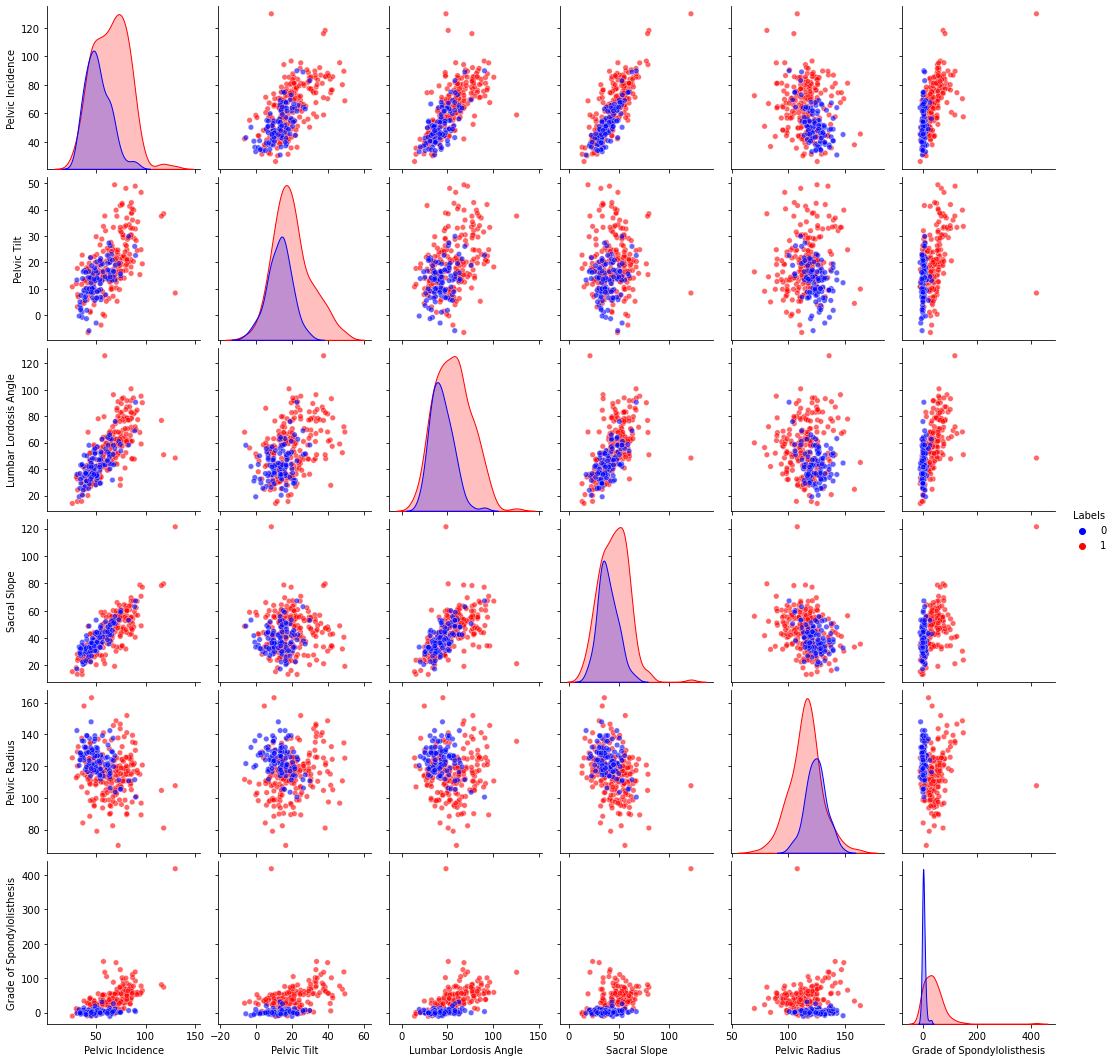

In [31]:
sns.pairplot(col_2C, hue='Labels', 
             plot_kws={'alpha': 0.6, 's': 30}, 
             palette={0: 'blue', 1: 'red'})
plt.show()

#### ii. Boxplots

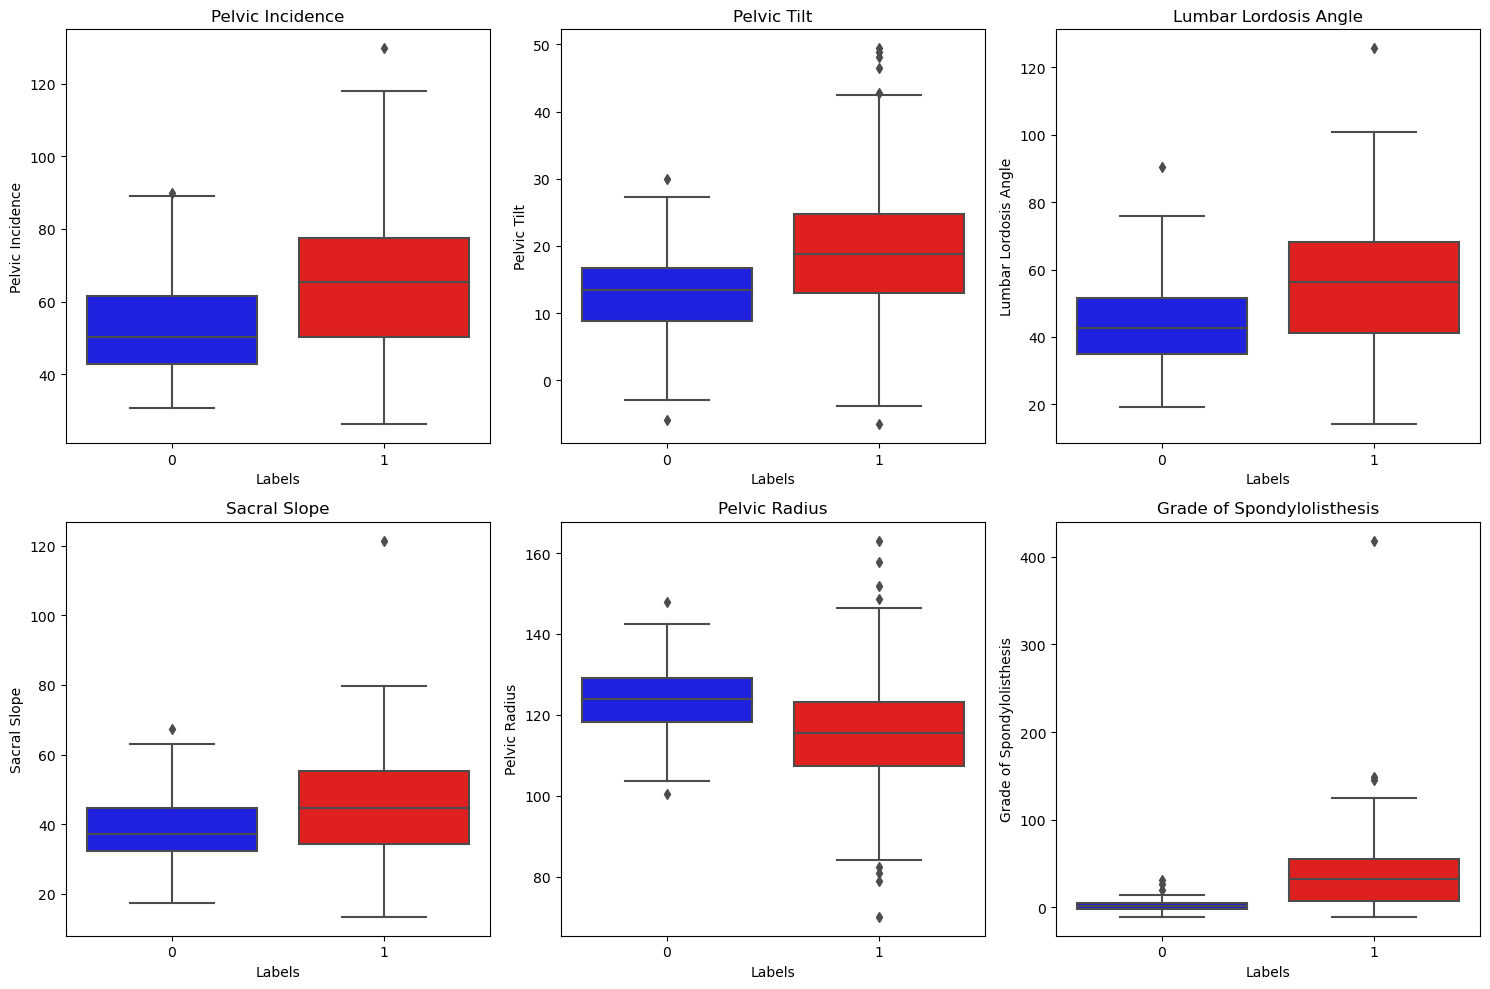

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Canvas

# Pelvic Incidence
sns.boxplot(x='Labels', y='Pelvic Incidence', data=col_2C, palette=['blue', 'red'], ax=axes[0, 0])
axes[0, 0].set_title('Pelvic Incidence')

# Pelvic Tilt
sns.boxplot(x='Labels', y='Pelvic Tilt', data=col_2C, palette=['blue', 'red'], ax=axes[0, 1])
axes[0, 1].set_title('Pelvic Tilt')

# Lumbar Lordosis Angle
sns.boxplot(x='Labels', y='Lumbar Lordosis Angle', data=col_2C, palette=['blue', 'red'], ax=axes[0, 2])
axes[0, 2].set_title('Lumbar Lordosis Angle')

# Sacral Slope
sns.boxplot(x='Labels', y='Sacral Slope', data=col_2C, palette=['blue', 'red'], ax=axes[1, 0])
axes[1, 0].set_title('Sacral Slope')

# Pelvic Radius
sns.boxplot(x='Labels', y='Pelvic Radius', data=col_2C, palette=['blue', 'red'], ax=axes[1, 1])
axes[1, 1].set_title('Pelvic Radius')

# Grade of Spondylolisthesis
sns.boxplot(x='Labels', y='Grade of Spondylolisthesis', data=col_2C, palette=['blue', 'red'], ax=axes[1, 2])
axes[1, 2].set_title('Grade of Spondylolisthesis')

plt.tight_layout()
plt.show()

#### iii. Split Data Set

In [19]:
class_0 = col_2C[col_2C['Labels'] == 0]
class_1 = col_2C[col_2C['Labels'] == 1]

# First 70 rows of class 0
train_0 = class_0.iloc[:70]

# First 140 rows of class 1
train_1 = class_1.iloc[:140]

# training ds
train_ds = pd.concat([train_0, train_1])

# test ds
test_ds = col_2C.drop(train_ds.index)

# Train and Test Dataset
x_train = train_ds.drop(columns=['Labels'])
y_train = train_ds['Labels']
x_test = test_ds.drop(columns=['Labels'])
y_test = test_ds['Labels']

### (c) Classification

#### i. Euclidean Metric

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.91      0.99      0.95        70

    accuracy                           0.92       100
   macro avg       0.93      0.88      0.90       100
weighted avg       0.92      0.92      0.92       100



#### ii. Test Data

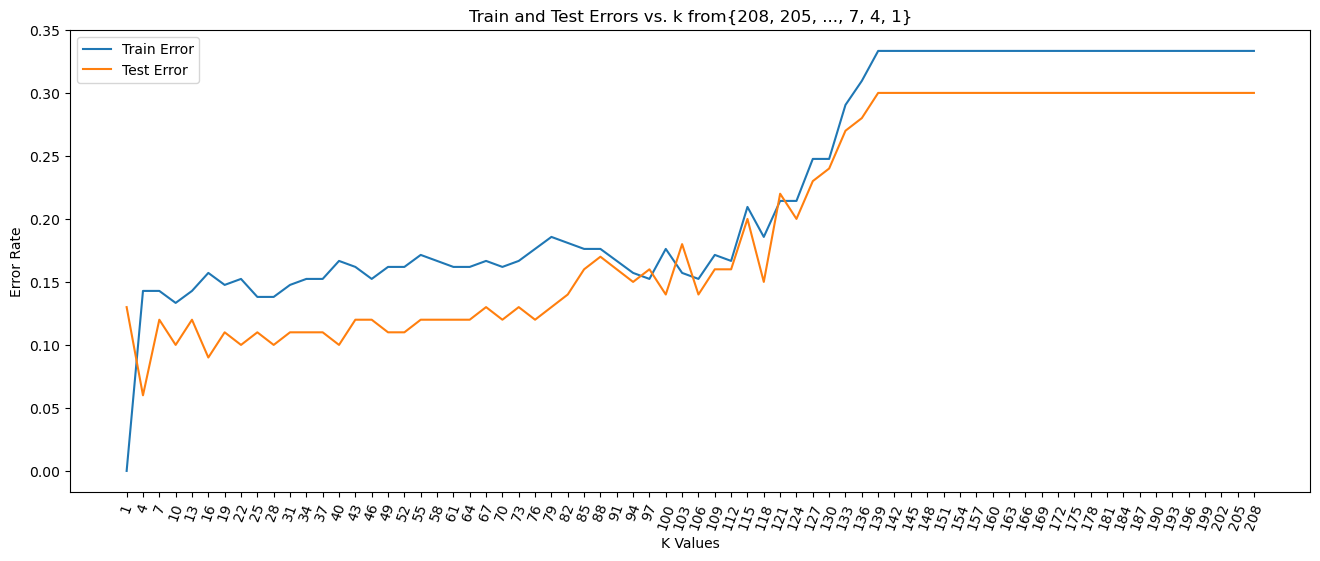

According to the plot above, we can see the best k value that has lowest test error rate would be  4


In [58]:
k_test_values = list(range(208, 0, -3)) # k = {208, 205, ..., 7, 4, 1}

# Train and Test Errors
train_errors = []
test_errors = []

# Test K from {208, 205, ..., 7, 4, 1}
for k in k_test_values:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn_classifier.fit(x_train, y_train)
    
    # Predict on training data
    y_train_pred = knn_classifier.predict(x_train)
    train_error = 1.0 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)

    # Predict on test data
    y_test_pred = knn_classifier.predict(x_test)
    test_error = 1.0 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)
    
plt.figure(figsize=(16, 6))
plt.plot(k_test_values, train_errors, label='Train Error')
plt.plot(k_test_values, test_errors, label='Test Error')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors vs. k from{208, 205, ..., 7, 4, 1}')
plt.legend()

plt.xticks(k_test_values)
plt.xticks(rotation=70)
plt.show()

# Find the best K
best_k_value = k_test_values[np.argmin(test_errors)]
print("According to the plot above, we can see the best k value that has lowest test error rate would be ", best_k_value)

In [59]:
# Confusion matrix, true positive rate, true negative rate, precision, and F1-score for k = k*
# According to the previous plot, the best k value would be 4
best_knn = KNeighborsClassifier(n_neighbors = best_k_value, metric = 'euclidean')
best_knn.fit(x_train, y_train)

# Confusion matrix
y_pred_best_knn = best_knn.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_best_knn)

# True postive Rate & True Negative Rate

# True Positives
TP = conf_matrix[1, 1]
# False Negatives
FN = conf_matrix[1, 0]
# True Negatives
TN = conf_matrix[0, 0]
# False Positives
FP = conf_matrix[0, 1]
# True Positive Rate
TPR = TP / (TP + FN)
# True Negative Rate
TNR = TN / (TN + FP)

# Precision, F1-score
classification_rep = classification_report(y_test, y_pred_best_knn)

print("Confusion Matrix:\n", conf_matrix)
print("\nThe True Positive Rate is ", round(TPR,4))
print("\nThe True Negative Rate is ", round(TNR,4))
print("\nClassification Report for k = 4(k*)\n", classification_rep)

Confusion Matrix:
 [[25  5]
 [ 1 69]]

The True Positive Rate is  0.9857

The True Negative Rate is  0.8333

Classification Report for k = 4(k*)
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



#### iii. Learning Curve

In [60]:
N_values = list(range(10, 211, 10))
N_values

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210]

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

##### C. Chebyshev Distance With p -> infinity.

#### ii. Mahalanobis Distance.

### (e) Weighted Decision

### (f) Training Error Rate